# Other neuron models

## Install sapinet  (if not already done) 

Uncomment the following line if you have not installed sapinet as explained in the readme 

In [23]:
# %pip install git+https://github.com/cplab/sapinet2.git

## Import general dependencies and specific sapinet dependencies

In [24]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [25]:
from sapicore.engine.neuron.spiking.IZ import IZNeuron
from sapicore.utils.plotting import spike_raster 

## Define experiment specific variables

Defining run-specific variables. Here we only need to know for how many step we want to simulate our neuron.

In [26]:
steps = 200

## Import an alternative neuronal class: the `IZNeuron`

In [27]:
neuron = IZNeuron()

## Generating step input 

Generating an input current step that we will pass to the neuron

In [28]:
I = torch.ones(steps) * 300
I[int(steps/2):] = 0
I[:int(steps/5)] = 0

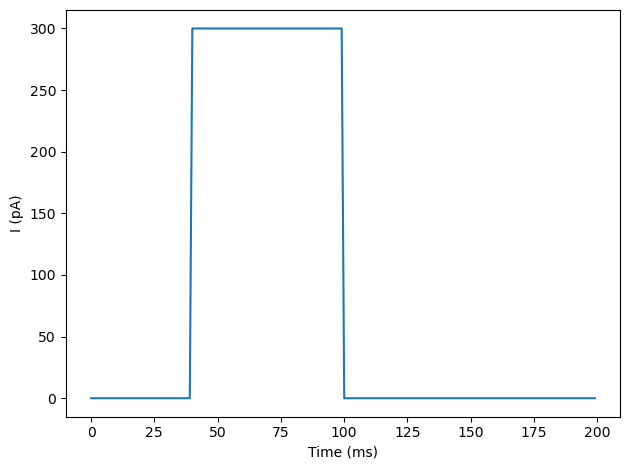

In [29]:
plt.subplots(1)
plt.plot(range(steps), I)
plt.xlabel('Time (ms)')
plt.ylabel('I (pA)')
plt.tight_layout()
plt.show()

## Getting neuron outputs (membrane voltage and spikes)

In [30]:
output = [neuron.forward(I[i]) for i in range(steps)]
print(output[0])

{'input': tensor([0.]), 'voltage': tensor([-66.7698]), 'spiked': tensor([False])}


## Plotting membrane voltage

In [31]:
volt_mem = [output[i].get('voltage') for i in range(steps)]
volt_mem = torch.cat(volt_mem)
volt_mem = volt_mem.unsqueeze(1)
volt_mem.shape

torch.Size([200, 1])

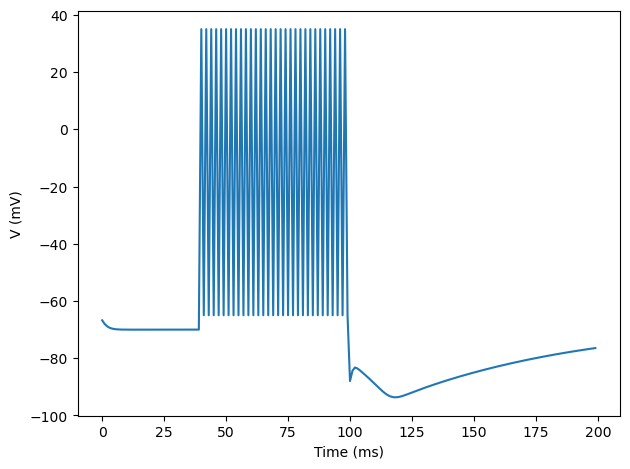

In [32]:
plt.subplots(1)
plt.plot(range(steps), volt_mem)
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)')
plt.tight_layout()
plt.show()

In [33]:
spikes = [output[i].get('spiked') for i in range(steps)]
spikes = torch.cat(spikes)
spikes = spikes.unsqueeze(1)
print(spikes.shape)

torch.Size([200, 1])


## Plotting spike output

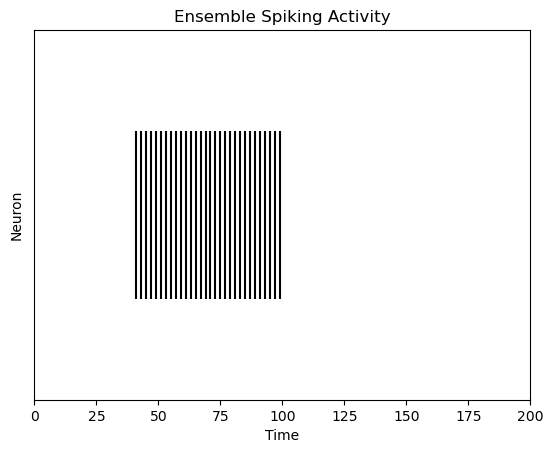

In [34]:
spike_raster(spikes)

## Let's try a different input

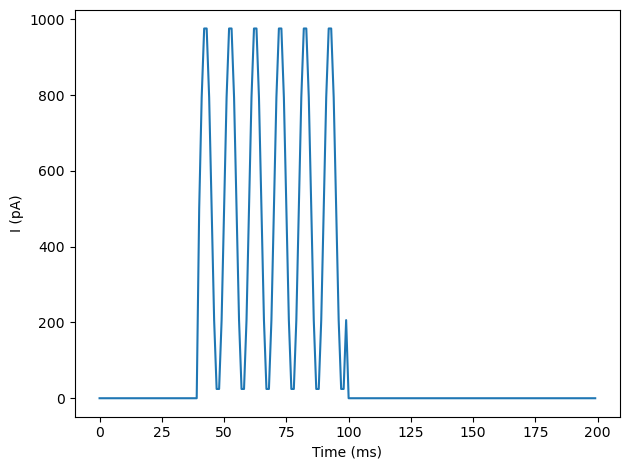

In [35]:
neuron2 = IZNeuron()

sin_wave = torch.tensor(np.sin(2 * np.pi * 20 * np.arange(steps) / 200) * 500 + 500)

sin_wave[int(steps/2):] = 0
sin_wave[:int(steps/5)] = 0

plt.subplots(1)
plt.plot(range(steps), sin_wave)
plt.xlabel('Time (ms)')
plt.ylabel('I (pA)')
plt.tight_layout()
plt.show()

In [36]:
output2 = [neuron2.forward(sin_wave[i]) for i in range(steps)]

In [37]:
volt_mem2 = [output2[i].get('voltage') for i in range(steps)]
volt_mem2 = torch.cat(volt_mem2)
volt_mem2 = volt_mem2.unsqueeze(1)
volt_mem2.shape

torch.Size([200, 1])

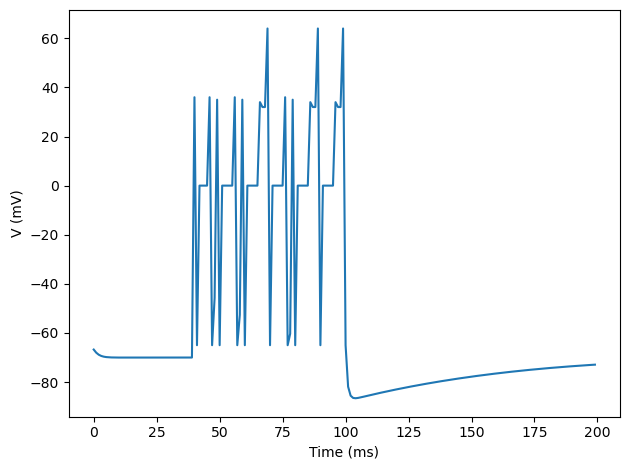

In [38]:
plt.subplots(1)
plt.plot(range(steps), volt_mem2)
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)')
plt.tight_layout()
plt.show()


In [39]:
spikes2 = [output2[i].get('spiked') for i in range(steps)]
spikes2 = torch.cat(spikes2)
spikes2 = spikes2.unsqueeze(1)

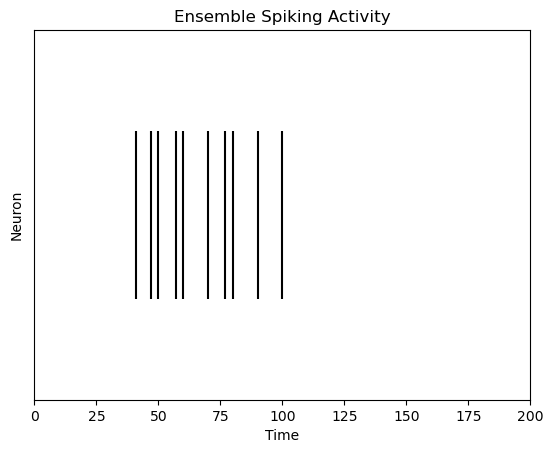

In [40]:
spike_raster(spikes2)

## Let's make this exploration more interactive interactive so we can explore the different parameters

In [41]:
import ipywidgets as widgets
from IPython.display import display

In [42]:
def IZSimulation(steps, 
                  i_start, 
                  i_end, 
                  i_amp, 
                  volt_peak, 
                  a, 
                  b, 
                  c, 
                  d):
    
    steps = steps

    I = torch.zeros(steps)
    I[i_start:i_end] = 1 * i_amp

    neuron3 = IZNeuron(volt_peak=volt_peak, 
                        a=a, 
                        b=b, 
                        c=c, 
                        d= d)
    
    output3 = [neuron3.forward(I[i]) for i in range(steps)]
        
    volt_mem3 = [output3[i].get('voltage') for i in range(steps)]
    volt_mem3 = torch.cat(volt_mem3)
    volt_mem3 = volt_mem3.unsqueeze(1)
     
    fig, (ax1,ax2) = plt.subplots(2)
    ax1.plot(range(steps), I)
    ax2.plot(range(steps), volt_mem3)
    ax2.axhline(volt_peak, color='green')

In [43]:

w = widgets.interact(IZSimulation,
                 steps = widgets.IntSlider(min = 10, max = 1000, value = 100),
                 i_start = widgets.IntSlider(min = 0, max = 1000, value=30),
                 i_end = widgets.IntSlider(min = 0, max = 1000, value = 60),
                 i_amp  = widgets.IntSlider(min = 0, max = 1000, value = 300),
                 volt_peak=widgets.IntSlider(min=20, max=50, value=35),
                 a=widgets.FloatSlider(min=0, max=0.05, value=0.02),
                 b=widgets.FloatSlider(min=0, max=0.5, value=0.2),
                 c=widgets.FloatSlider(min=-75, max=-50, value=-65),
                 d=widgets.FloatSlider(min=0, max=5.0, value=2)
                )
display(w)

interactive(children=(IntSlider(value=100, description='steps', max=1000, min=10), IntSlider(value=30, descrip…

<function __main__.IZSimulation(steps, i_start, i_end, i_amp, volt_peak, a, b, c, d)>